**Import necessary library**

In [10]:
import requests
import certifi
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator
from IPython.display import display, HTML
import numpy as np

**Replace with your API key**

In [11]:
api_key = "255446bcdde7ca9fe776258d09e8411bbb8d1cade2ebd6aba440f80f6817c3fd"

**EX3. Frequencies of HAS and HATH in the plays**

**Text set = Shakespeare 20 for demos**  
**Segment by text**  
**Include metadata in output**  
**Words unsorted – HAS HATH**  
**Output – choose proportions**  
**Transform and chart – sort by DATE, plot HAS and HATH as lines**

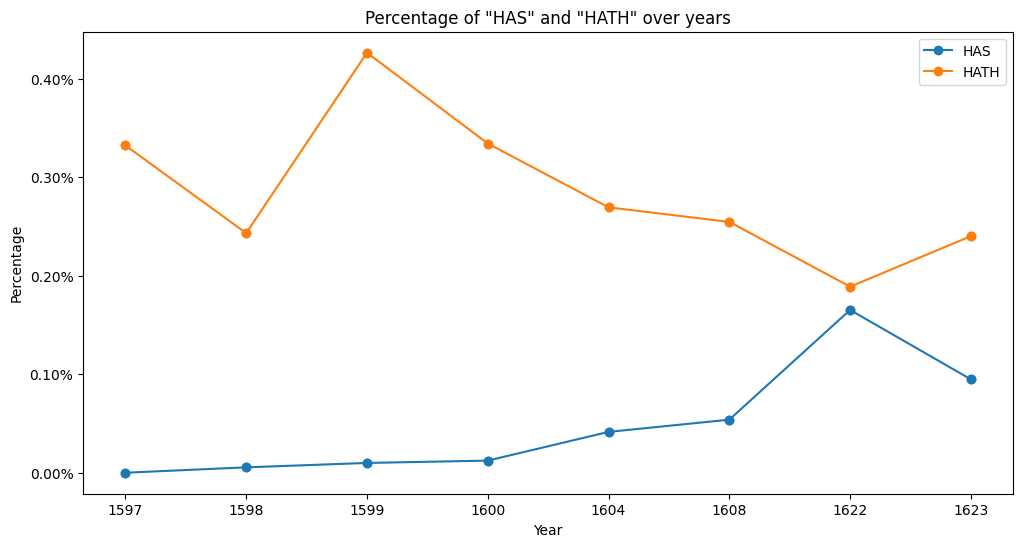

Title,Author,Source,Company of First Production,DEEP_ID,Date of first performance,Date_of_publication,Genre,Metadata_source,Play_type,STC_or_WING,W&R_ID,SIZE in words
1 Henry IV Q1,Shakespeare William,1HenryIV_1598.xml,Lord Chamberlain's (Hunsdon's) Men,240,1597,1598,History,W&R,Adult Professional,22279a,1059,24225
Antony and Cleopatra,Shakespeare William,AntonyandCleopatra_1623.xml,King's Men,5081.35,1606,1623,Tragedy,W&R,Adult Professional,22273,1517,24105
Comedy of Errors,Shakespeare William,ComedyofErrors_SilentReg_1623.xml,Derby's (Strange's) Men,5081.05,1592,1623,Comedy,W&R,Adult Professional,22273,944,14496
Coriolanus,Shakespeare William,Coriolanus_SilentReg_1623.xml,King's Men,5081.26,1608,1623,Tragedy,W&R,Adult Professional,22273,1589,26953
Hamlet Q2,Shakespeare William,Hamlet_1604.xml,Lord Chamberlain's (Hunsdon's) Men,348,1600,1604,Tragedy,W&R,Adult Professional,22276,1259,29175
Henry V F,Shakespeare William,HenryV_1623.xml,Lord Chamberlain's (Hunsdon's) Men,5081.19,1599,1623,History,W&R,Adult Professional,22273,1183,24917
Julius Caesar,Shakespeare William,JuliusCaesar_SilentReg_1623.xml,Lord Chamberlain's (Hunsdon's) Men,5081.3,1599,1623,Tragedy,W&R,Adult Professional,22273,1198,19222
King Lear Q1,Shakespeare William,KingLear_1608.xml,King's Men,517,1605,1608,Tragedy,W&R,Adult Professional,22292,1486,24694
Love's Labor's Lost Q1,Shakespeare William,LovesLaboursLost_1598.xml,Lord Chamberlain's (Hunsdon's) Men,256,1595,1598,Comedy,W&R,Adult Professional,22294,1031,21135
Macbeth,Shakespeare William,Macbeth_SilentReg_1623.xml,King's Men,5081.31,1606,1623,Tragedy,W&R,Adult Professional,22273,1496,16657


In [12]:
# 3. Frequencies of HAS and HATH in the plays 

# Text set = Shakespeare 20 for demos 
# Segment by text 
# Include metadata in output 
# Words unsorted – HAS HATH 
# Output – choose proportions 
# Transform and chart – sort by DATE, plot HAS and HATH as lines 

# Replace with your actual text set ID 
textset_id = 86 

#Character to exlude from search
excludeWords = ["[","\\", "]", "_", "`", "!", "\"", "#", "%", "'", "(", ")", "+", ",", "-", "–", ".", "/", ":", ";", "{", "|", "}", "=", "~", "?" ]

request_url = "https://sia.ardc-hdcl-sia-iaw.cloud.edu.au/api/v1/word-frequencies"
character_parts_request = {
    'textSet': textset_id,
    'option': {
        'blockMethod' : 0,         #Segment by text
        'showMetadata' : True,
        'outputSize': 1000 , 
        # 'outputSpecialWords' : ["has","hath"],
        # 'outputSpecialWordsOption' : 0,
        'excludeWords': excludeWords,
    }
}


# Make API request
response = requests.post(request_url, json=character_parts_request, headers={"X-API-KEY": api_key}, timeout=1200)

special_word_count_by_year = {"has": {}, "hath": {}}
total_word_count_by_year = {}

# Handle the response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])
    

    for block in blocks:
        name = block.get("name", "")
        freqs = block.get("frequencies", [])
        
        # Extract year from name
        year = block.get('metadata').get('Date_of_publication')
        
        name.split("_")[-1].split(" ")[0]
        
        for freq in freqs:
            word = freq.get("word", "")
            value = freq.get("value", 0)
            
            if word.lower() == "has":
                special_word_count_by_year["has"][year] = special_word_count_by_year["has"].get(year, 0) + value
            elif word.lower() == "hath":
                special_word_count_by_year["hath"][year] = special_word_count_by_year["hath"].get(year, 0) + value
                
            total_word_count_by_year[year] = total_word_count_by_year.get(year, 0) + value

    # Sort by Year
    sorted_years = sorted(set(special_word_count_by_year["has"].keys()) | set(special_word_count_by_year["hath"].keys()))
    has_counts = [(special_word_count_by_year["has"].get(year, 0) / total_word_count_by_year.get(year, 1)) * 100 for year in sorted_years]
    hath_counts = [(special_word_count_by_year["hath"].get(year, 0) / total_word_count_by_year.get(year, 1)) * 100 for year in sorted_years]

    plt.figure(figsize=(12, 6))
    plt.plot(sorted_years, has_counts, label='HAS', marker='o')
    plt.plot(sorted_years, hath_counts, label='HATH', marker='o')
    plt.scatter(sorted_years, has_counts)
    plt.scatter(sorted_years, hath_counts)
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.title('Percentage of "HAS" and "HATH" over years')

    y_ticks = plt.gca().get_yticks()
    plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))
    plt.gca().set_yticklabels(['{:.2f}%'.format(y) for y in y_ticks])

    plt.legend()
    plt.show()
    
    
    # Metadata
    html = '<div style="overflow: auto; max-height: 500px; margin-top: 40px;">'
    html += '<h2>Metadata</h2>'
    html += '<table border="1">'
     # Adding the table header for Metadata
    if blocks:
        first_metadata = blocks[0].get("metadata", {})
        html += '<tr>'
        for header in first_metadata.keys():
            html += f'<th>{header}</th>'
        html += '</tr>'
        
        # Adding Metadata data rows
        for block in blocks:
            metadata = block.get("metadata", {})
            html += '<tr>'
            for key in first_metadata.keys():  # Ensure the same order as headers
                html += f'<td>{metadata.get(key, "N/A")}</td>'
            html += '</tr>'
        
    html += '</table></div>'
    
    # Display the table
    display(HTML(html))

    
else:
    print(f"Failed: {response.status_code} {response.reason}")